In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

#### Step 1: Reading and Understanding the Data

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

There are 200 rows and 4 columns present in the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


There are no missing values present in the data and also the data type is completely float

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

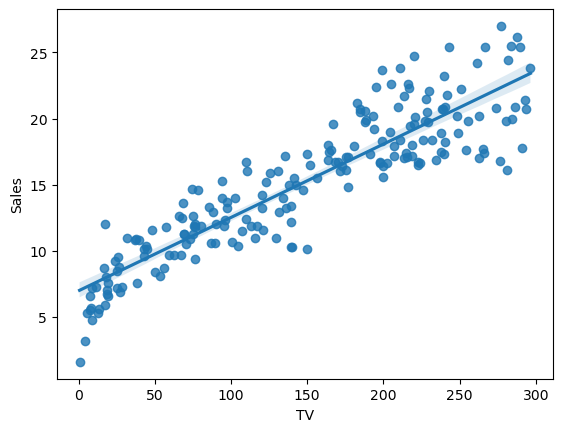

In [7]:
sns.regplot(x='TV', y='Sales', data=df)
plt.show()

Rather than checking the relationship indivually, we can plot the pair plot which gives all the relationships at once

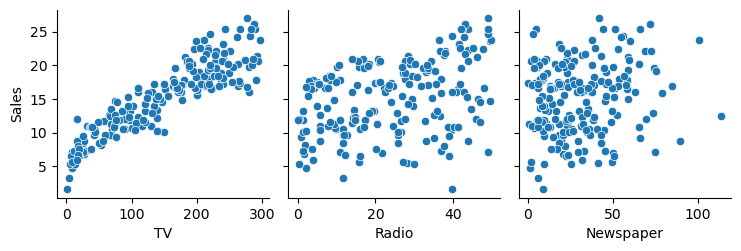

In [8]:
sns.pairplot(data=df, x_vars = ['TV', 'Radio', 'Newspaper'] , y_vars='Sales')
plt.show()

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


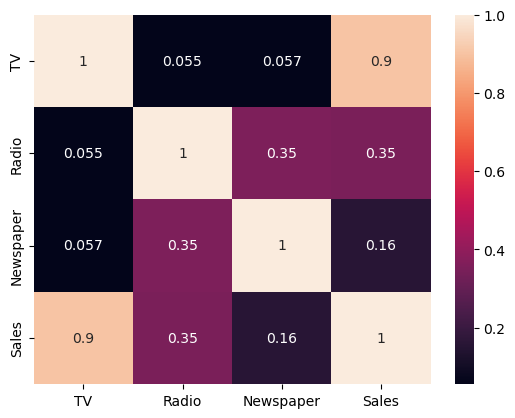

In [10]:
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Step 2: Performing Simple Linear Regression
In our case,
y = c+m1 X TV

In [11]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

##### Steps Included in model building
1. Create X and y
2. Create Train and test splits (80-20 ratio or 70-30 ratio)
3. Train the model on training set
4. Evaluate the model on training set and test set

##### 1. Create X and y

In [12]:
X = df['TV']
y = df['Sales']

##### 2. Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70, random_state = 100)
X_train.shape

(140,)

In the statsmodels, constant or the intercept will not be there by default thus we have to add it manually

##### Training the model

Adding constant

In [14]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [15]:
X_train_sm.shape

(140, 2)

y = c.const + m1.X1

Fitting the model

In [16]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model

In [17]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [18]:
# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           1.52e-52
Time:                        07:59:27   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

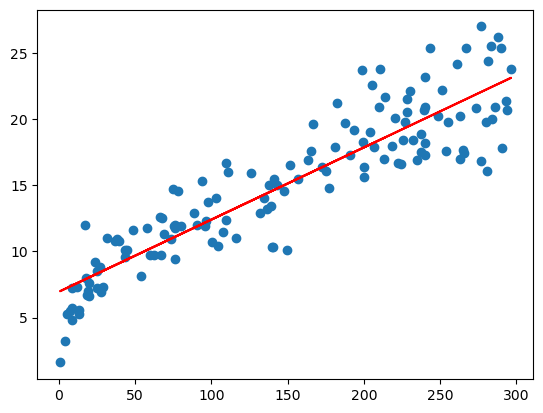

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')

#### 3. Residual Analysis

In [25]:
res = y_train -y_train_pred
res.head()

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_8124\187527672.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 1.0, 'Residual Plot')

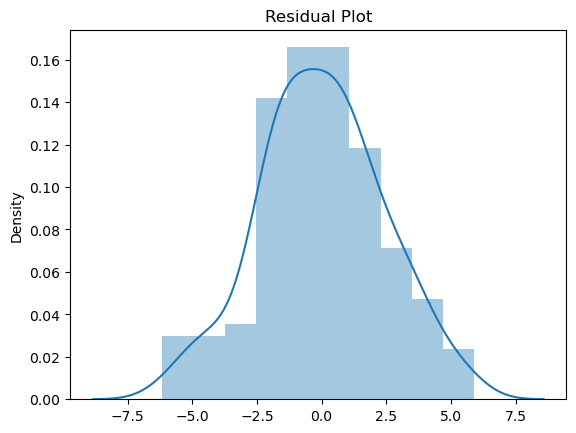

In [30]:
# plot the residual
plt.figure()
sns.distplot(res)
plt.title('Residual Plot')

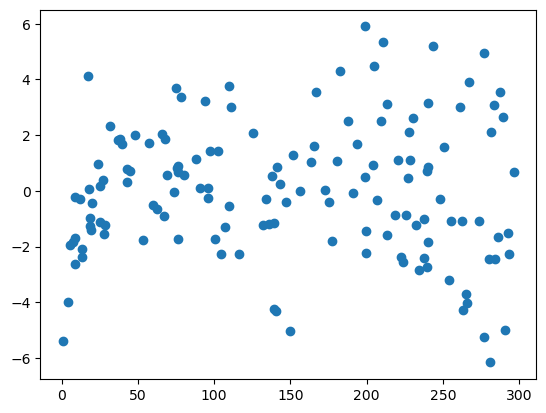

In [35]:
# look for patterns in residuals
plt.scatter(X_train, res)
plt.show()

#### 4 Predictions and Evaluation on the Test Set

Prdcitions on the test set - y_test_pred

In [37]:
# add a intercept to text set
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
r2 = r2_score(y_test, y_test_pred)
r2

0.7921031601245658

In [43]:
mean_squared_error(y_test, y_test_pred)

4.077556371826956

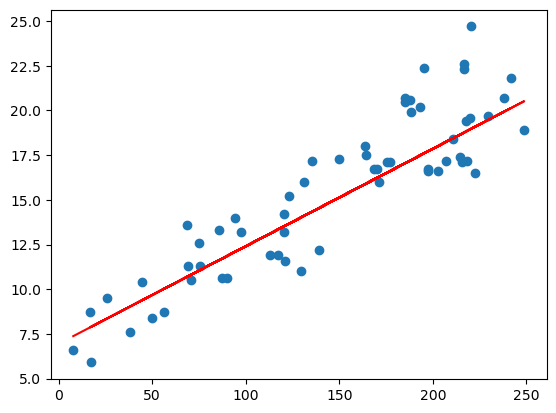

In [44]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()